<a href="https://colab.research.google.com/github/MerveKaragulTabas/DL--Deep-Learning/blob/main/DL_S10_(Multivariate_Time_Series_with_RNN_Time_Series_Generator_energydata)_tanh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 10 Part - 2<br><br>Multivariate Time Series Forecasting with RNN<br><br>(Time Series Generator)<br><h1>

# Dataset Info

Appliance Energy Usage: A Multivariate Time Series Forecasting Example

Experimental data used to create regression models of appliances energy use in a low energy building.
Data Set Information:

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).
Original source of the dataset:

http://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction

- date time year-month-day hour:minute:second
- Appliances, energy use in Wh
- lights, energy use of light fixtures in the house in Wh
- T1, Temperature in kitchen area, in Celsius
- RH_1, Humidity in kitchen area, in %
- T2, Temperature in living room area, in Celsius
- RH_2, Humidity in living room area, in %
- T3, Temperature in laundry room area
- RH_3, Humidity in laundry room area, in %
- T4, Temperature in office room, in Celsius
- RH_4, Humidity in office room, in %
- T5, Temperature in bathroom, in Celsius
- RH_5, Humidity in bathroom, in %
- T6, Temperature outside the building (north side), in Celsius
- RH_6, Humidity outside the building (north side), in %
- T7, Temperature in ironing room , in Celsius
- RH_7, Humidity in ironing room, in %
- T8, Temperature in teenager room 2, in Celsius
- RH_8, Humidity in teenager room 2, in %
- T9, Temperature in parents room, in Celsius
- RH_9, Humidity in parents room, in %
- To, Temperature outside (from Chievres weather station), in Celsius
- Pressure (from Chievres weather station), in mm Hg
- RH_out, Humidity outside (from Chievres weather station), in %
- Wind speed (from Chievres weather station), in m/s
- Visibility (from Chievres weather station), in km
- Tdewpoint (from Chievres weather station), Â°C
- rv1, Random variable 1, nondimensional
- rv2, Random variable 2, nondimensional

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Recognizing and Understanding Data

In [2]:
df = pd.read_csv('energydata_complete.csv',index_col='date', parse_dates = True)

In [3]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890,47.597,19.200,44.790,19.790,44.730,19.000,45.567,17.167,55.200,7.027,84.257,17.200,41.627,18.200,48.900,17.033,45.530,6.600,733.500,92.000,7.000,63.000,5.300,13.275,13.275
2016-01-11 17:10:00,60,30,19.890,46.693,19.200,44.722,19.790,44.790,19.000,45.992,17.167,55.200,6.833,84.063,17.200,41.560,18.200,48.863,17.067,45.560,6.483,733.600,92.000,6.667,59.167,5.200,18.606,18.606
2016-01-11 17:20:00,50,30,19.890,46.300,19.200,44.627,19.790,44.933,18.927,45.890,17.167,55.090,6.560,83.157,17.200,41.433,18.200,48.730,17.000,45.500,6.367,733.700,92.000,6.333,55.333,5.100,28.643,28.643
2016-01-11 17:30:00,50,40,19.890,46.067,19.200,44.590,19.790,45.000,18.890,45.723,17.167,55.090,6.433,83.423,17.133,41.290,18.100,48.590,17.000,45.400,6.250,733.800,92.000,6.000,51.500,5.000,45.410,45.410
2016-01-11 17:40:00,60,40,19.890,46.333,19.200,44.530,19.790,45.000,18.890,45.530,17.200,55.090,6.367,84.893,17.200,41.230,18.100,48.590,17.000,45.400,6.133,733.900,92.000,5.667,47.667,4.900,10.084,10.084


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9         

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.000,97.695,102.525,10.000,50.000,60.000,100.000,1080.000
lights,19735.000,3.802,7.936,0.000,0.000,0.000,0.000,70.000
T1,19735.000,21.687,1.606,16.790,20.760,21.600,22.600,26.260
RH_1,19735.000,40.260,3.979,27.023,37.333,39.657,43.067,63.360
T2,19735.000,20.341,2.193,16.100,18.790,20.000,21.500,29.857
RH_2,19735.000,40.420,4.070,20.463,37.900,40.500,43.260,56.027
T3,19735.000,22.268,2.006,17.200,20.790,22.100,23.290,29.236
RH_3,19735.000,39.243,3.255,28.767,36.900,38.530,41.760,50.163
T4,19735.000,20.855,2.043,15.100,19.530,20.667,22.100,26.200
RH_4,19735.000,39.027,4.341,27.660,35.530,38.400,42.157,51.090


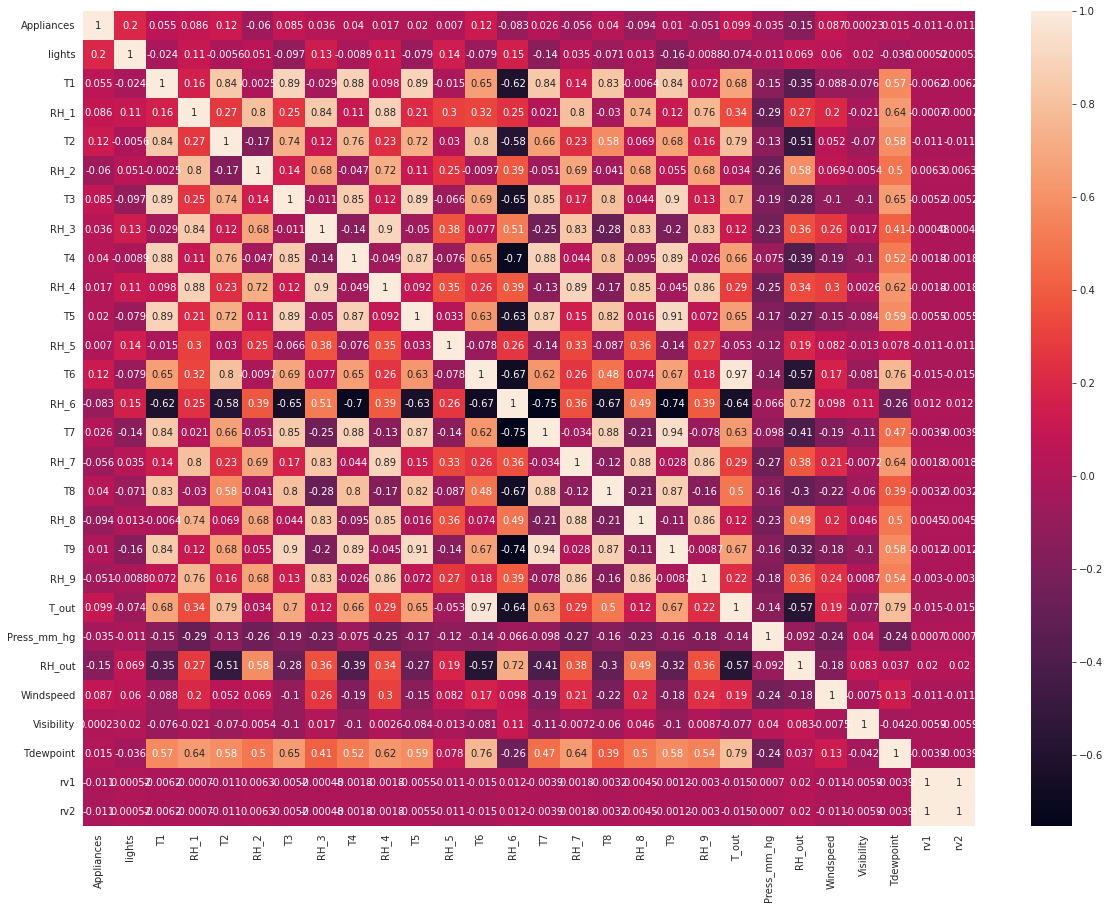

In [6]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True);

# Data Pre-Processing

## Feature Engineering
- Let's reduce the number of feature
- Let's resample the dataset by hours

In [7]:
df.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [8]:
df=df.rename(columns = {'T6':'T_outside', 'RH_6':'RH_outside'})
df["T_inside"] = (df["T1"] + df["T2"] + df["T3"] + df["T4"] + df["T5"] + df["T7"] + df["T8"] + df["T9"])/8
df["RH_inside"] = (df["RH_1"] + df["RH_2"] + df["RH_3"] + df["RH_4"] + df["RH_5"] + df["RH_7"] + df["RH_8"] + df["RH_9"])/8

In [9]:
drop_list = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
             'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'RH_out', 'rv1', 'rv2']
df.drop(drop_list, axis = 1, inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T_outside    19735 non-null  float64
 3   RH_outside   19735 non-null  float64
 4   Press_mm_hg  19735 non-null  float64
 5   Windspeed    19735 non-null  float64
 6   Visibility   19735 non-null  float64
 7   Tdewpoint    19735 non-null  float64
 8   T_inside     19735 non-null  float64
 9   RH_inside    19735 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 1.7 MB


In [11]:
df_a = df[["Appliances", "lights"]]
df_b = df.drop(["Appliances", "lights"], axis = 1)

In [12]:
df_a = df_a.resample("H").sum()
df_b = df_b.resample("H").mean()

In [13]:
df = pd.concat([df_a, df_b], axis =1)
df.head()

,Appliances,lights,T_outside,RH_outside,Press_mm_hg,Windspeed,Visibility,Tdewpoint,T_inside,RH_inside
date,,,,,,,,,,
2016-01-11 17:00:00,330,210,6.587,84.260,733.750,6.167,53.417,5.050,18.415,46.555
2016-01-11 18:00:00,1060,310,6.180,87.204,734.267,5.417,40.000,4.658,18.408,46.520
2016-01-11 19:00:00,1040,150,5.857,88.131,734.792,6.000,40.000,4.392,18.686,48.665
2016-01-11 20:00:00,750,210,5.469,86.934,735.283,6.000,40.000,4.017,18.941,50.356
2016-01-11 21:00:00,620,140,5.579,86.129,735.567,6.000,40.000,3.817,19.254,48.977


In [14]:
df.shape

(3290, 10)

Let's also round off the data, to one decimal point precision, otherwise this may cause issues with our network (we will also normalize the data anyways, so this level of precision isn't useful to us)

In [15]:
df = df.round(2)

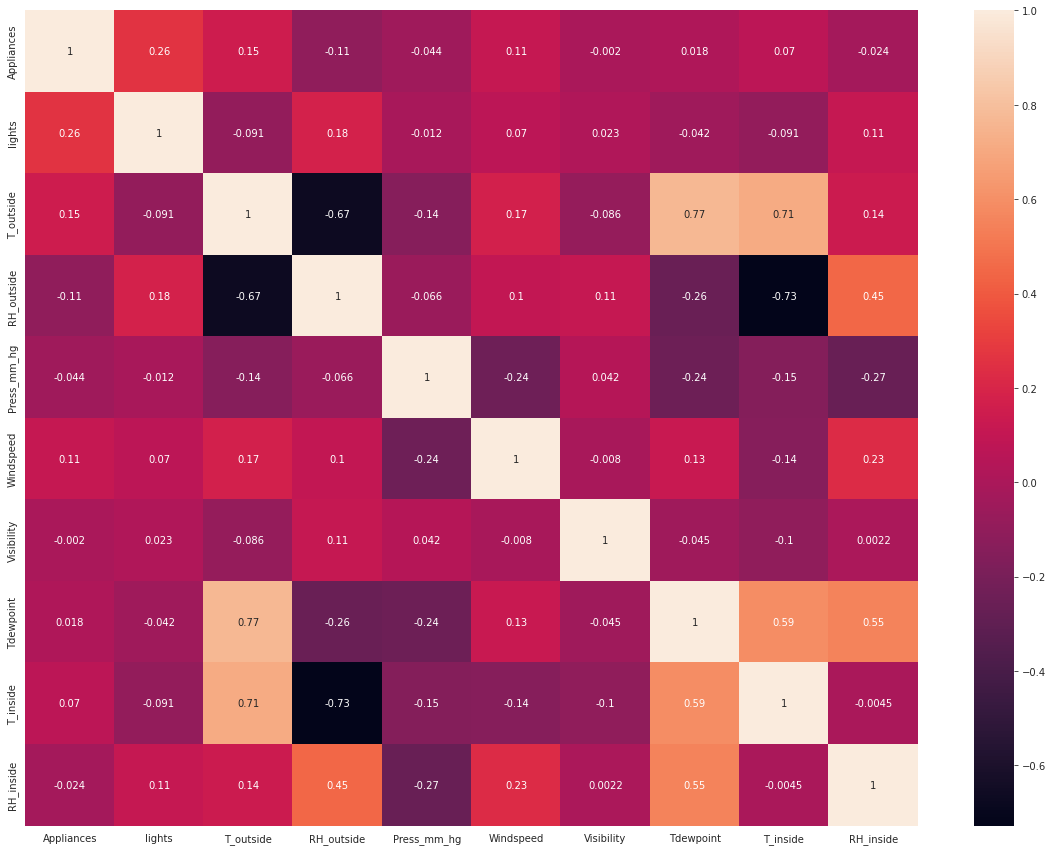

In [16]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True);

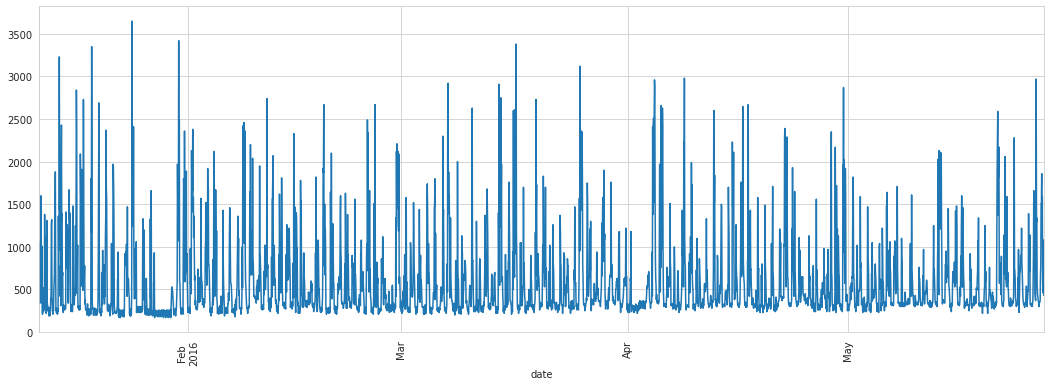

In [17]:
df['Appliances'].plot(figsize=(18,6))
plt.xticks(rotation=90);

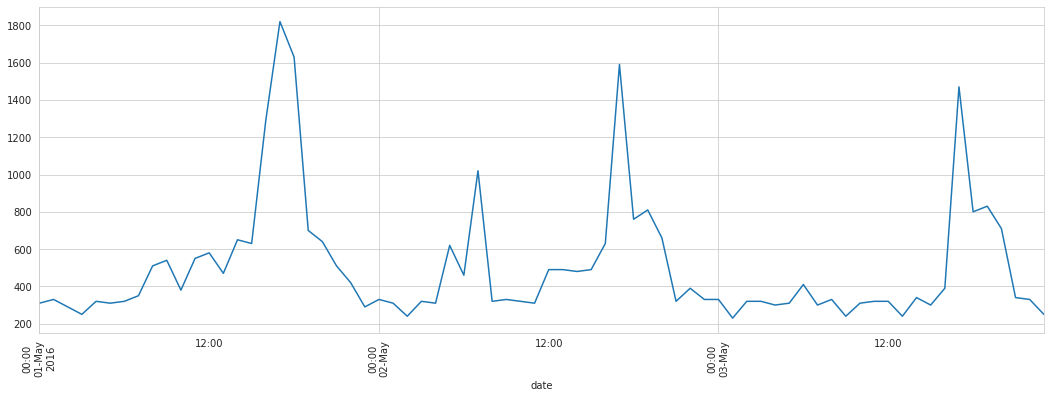

In [18]:
df['Appliances'].loc["2016-05-01 00:00:00" : "2016-05-03 23:00:00"].plot(figsize=(18,6))
plt.xticks(rotation=90);

### Train Test Split

In [19]:
len(df)

3290

In [20]:
# How many rows per day?
24

24

In [21]:
test_days = 7

In [22]:
test_ind = test_days*24

In [23]:
test_ind

168

In [24]:
train = df.iloc[:-test_ind]
test = df.iloc[-test_ind:]

In [25]:
train.shape, test.shape

((3122, 10), (168, 10))

### Scale Data

In [26]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [27]:
scaler = MinMaxScaler()

In [28]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Create the Model

In [29]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
length = 24 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(train_scaled, train_scaled, length=length, batch_size=batch_size)
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length=length, batch_size=batch_size)

In [32]:
len(train_scaled), len(generator), len(test_scaled), len(validation_generator)

(3122, 3098, 168, 144)

In [33]:
n_features = train_scaled.shape[1]

In [34]:
model = Sequential()

model.add(LSTM(100,input_shape=(length, n_features)))

model.add(Dense(n_features))

model.compile(optimizer='adam', loss='mse')

In [35]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [36]:
model.fit_generator(generator,
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

Epoch 1/10
3098/3098 [==============================] - 39s 12ms/step - loss: 0.0086 - val_loss: 0.0054
Epoch 2/10
3098/3098 [==============================] - 33s 11ms/step - loss: 0.0047 - val_loss: 0.0042
Epoch 3/10
3098/3098 [==============================] - 32s 10ms/step - loss: 0.0044 - val_loss: 0.0041
Epoch 4/10
3098/3098 [==============================] - 32s 10ms/step - loss: 0.0042 - val_loss: 0.0051
Epoch 5/10
3098/3098 [==============================] - 32s 10ms/step - loss: 0.0041 - val_loss: 0.0037
Epoch 6/10
3098/3098 [==============================] - 32s 10ms/step - loss: 0.0040 - val_loss: 0.0042
Epoch 7/10
3098/3098 [==============================] - 33s 10ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 8/10
3098/3098 [==============================] - 32s 10ms/step - loss: 0.0039 - val_loss: 0.0039


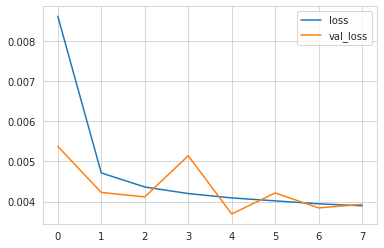

In [37]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Evaluate on Test Data

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [39]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [40]:
train_scaled

array([[0.04597701, 0.67741935, 0.36747872, ..., 0.53060285, 0.24072217,
        0.72111369],
       [0.25574713, 1.        , 0.35544467, ..., 0.51265532, 0.23971916,
        0.71972158],
       [0.25      , 0.48387097, 0.34605225, ..., 0.5002301 , 0.26780341,
        0.81948956],
       ...,
       [0.03448276, 0.        , 0.79189903, ..., 0.86746434, 0.72016048,
        0.65614849],
       [0.08045977, 0.        , 0.78544174, ..., 0.81316153, 0.73420261,
        0.69605568],
       [0.0862069 , 0.03225806, 0.76342824, ..., 0.75977911, 0.75025075,
        0.80510441]])

In [41]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [42]:
predictions_scaled

[array([0.11306287, 0.0295431 , 0.75577086, 0.02483821, 0.6531925 ,
        0.33863693, 0.58151054, 0.750013  , 0.7643152 , 0.7387453 ],
       dtype=float32),
 array([0.1385681 , 0.02688724, 0.7587725 , 0.0493428 , 0.64043665,
        0.33882558, 0.5452797 , 0.75611943, 0.7816837 , 0.659943  ],
       dtype=float32),
 array([0.1686131 , 0.03140764, 0.7708935 , 0.05695347, 0.6327138 ,
        0.34645188, 0.54078627, 0.76569617, 0.80294025, 0.61342025],
       dtype=float32),
 array([0.19013369, 0.03708723, 0.78421634, 0.05274451, 0.6305705 ,
        0.35064524, 0.5408764 , 0.7745943 , 0.8244286 , 0.5803013 ],
       dtype=float32),
 array([0.20249456, 0.04083291, 0.797435  , 0.03883977, 0.63213426,
        0.35310298, 0.5407392 , 0.78145593, 0.84557325, 0.5523901 ],
       dtype=float32),
 array([0.20877755, 0.04161625, 0.81111914, 0.01774079, 0.63593376,
        0.3542663 , 0.5399438 , 0.78573483, 0.86623627, 0.5260911 ],
       dtype=float32),
 array([ 0.21218446,  0.03982404,  0.826

In [43]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: -18.165428379250546 
mae: 0.19504088391780344 
mse: 0.06423626238411534 
rmse: 0.25344873719179456


## Inverse Transformations and Compare

In [44]:
predictions = scaler.inverse_transform(predictions_scaled)
predictions = pd.DataFrame(data=predictions,columns=test.columns)
predictions

,Appliances,lights,T_outside,RH_outside,Press_mm_hg,Windspeed,Visibility,Tdewpoint,T_inside,RH_inside
0,563.459,9.158,19.819,3.456,757.389,4.680,38.974,9.818,23.640,46.930
1,652.217,8.335,19.921,5.880,756.842,4.682,36.634,9.950,23.813,45.232
2,756.774,9.736,20.334,6.633,756.511,4.778,36.344,10.159,24.025,44.229
3,831.665,11.497,20.788,6.216,756.419,4.831,36.350,10.352,24.240,43.515
4,874.681,12.658,21.239,4.841,756.486,4.862,36.341,10.501,24.450,42.914
5,896.546,12.901,21.705,2.755,756.649,4.877,36.290,10.594,24.656,42.347
6,908.402,12.345,22.212,0.154,756.862,4.880,36.234,10.624,24.859,41.785
7,917.387,11.238,22.772,-2.798,757.100,4.868,36.193,10.593,25.060,41.220
8,926.801,9.818,23.383,-5.971,757.359,4.838,36.167,10.510,25.262,40.654
9,937.296,8.261,24.032,-9.255,757.644,4.788,36.145,10.385,25.467,40.090


In [45]:
test_new = test[:length]

In [46]:
for i in test_new.columns:
    print(i)
    eval_metrics(test_new[i], predictions[i])
    print("--"*15)

Appliances
r2_score: 0.10040521245906386 
mae: 637.4047860254844 
mse: 534644.0193023867 
rmse: 731.1935580285063
------------------------------
lights
r2_score: -2.982671691403161 
mae: 9.221314555810144 
mse: 129.98997881663092 
rmse: 11.401314784560197
------------------------------
T_outside
r2_score: -1.7272880512038666 
mae: 7.969739246318738 
mse: 71.03252364002297 
rmse: 8.428079475184306
------------------------------
RH_outside
r2_score: -3.157897747944805 
mae: 42.02033975409344 
mse: 2074.5991210051093 
rmse: 45.547767464554276
------------------------------
Press_mm_hg
r2_score: -21.712000485929195 
mae: 4.714268053372673 
mse: 45.151800011867316 
rmse: 6.719508911510373
------------------------------
Windspeed
r2_score: -0.8214149020859742 
mae: 2.13667247146368 
mse: 6.4178765189422045 
rmse: 2.5333528216460897
------------------------------
Visibility
r2_score: -0.040306728864192065 
mae: 5.21700504903992 
mse: 36.60448378866612 
rmse: 6.050163947255158
----------------

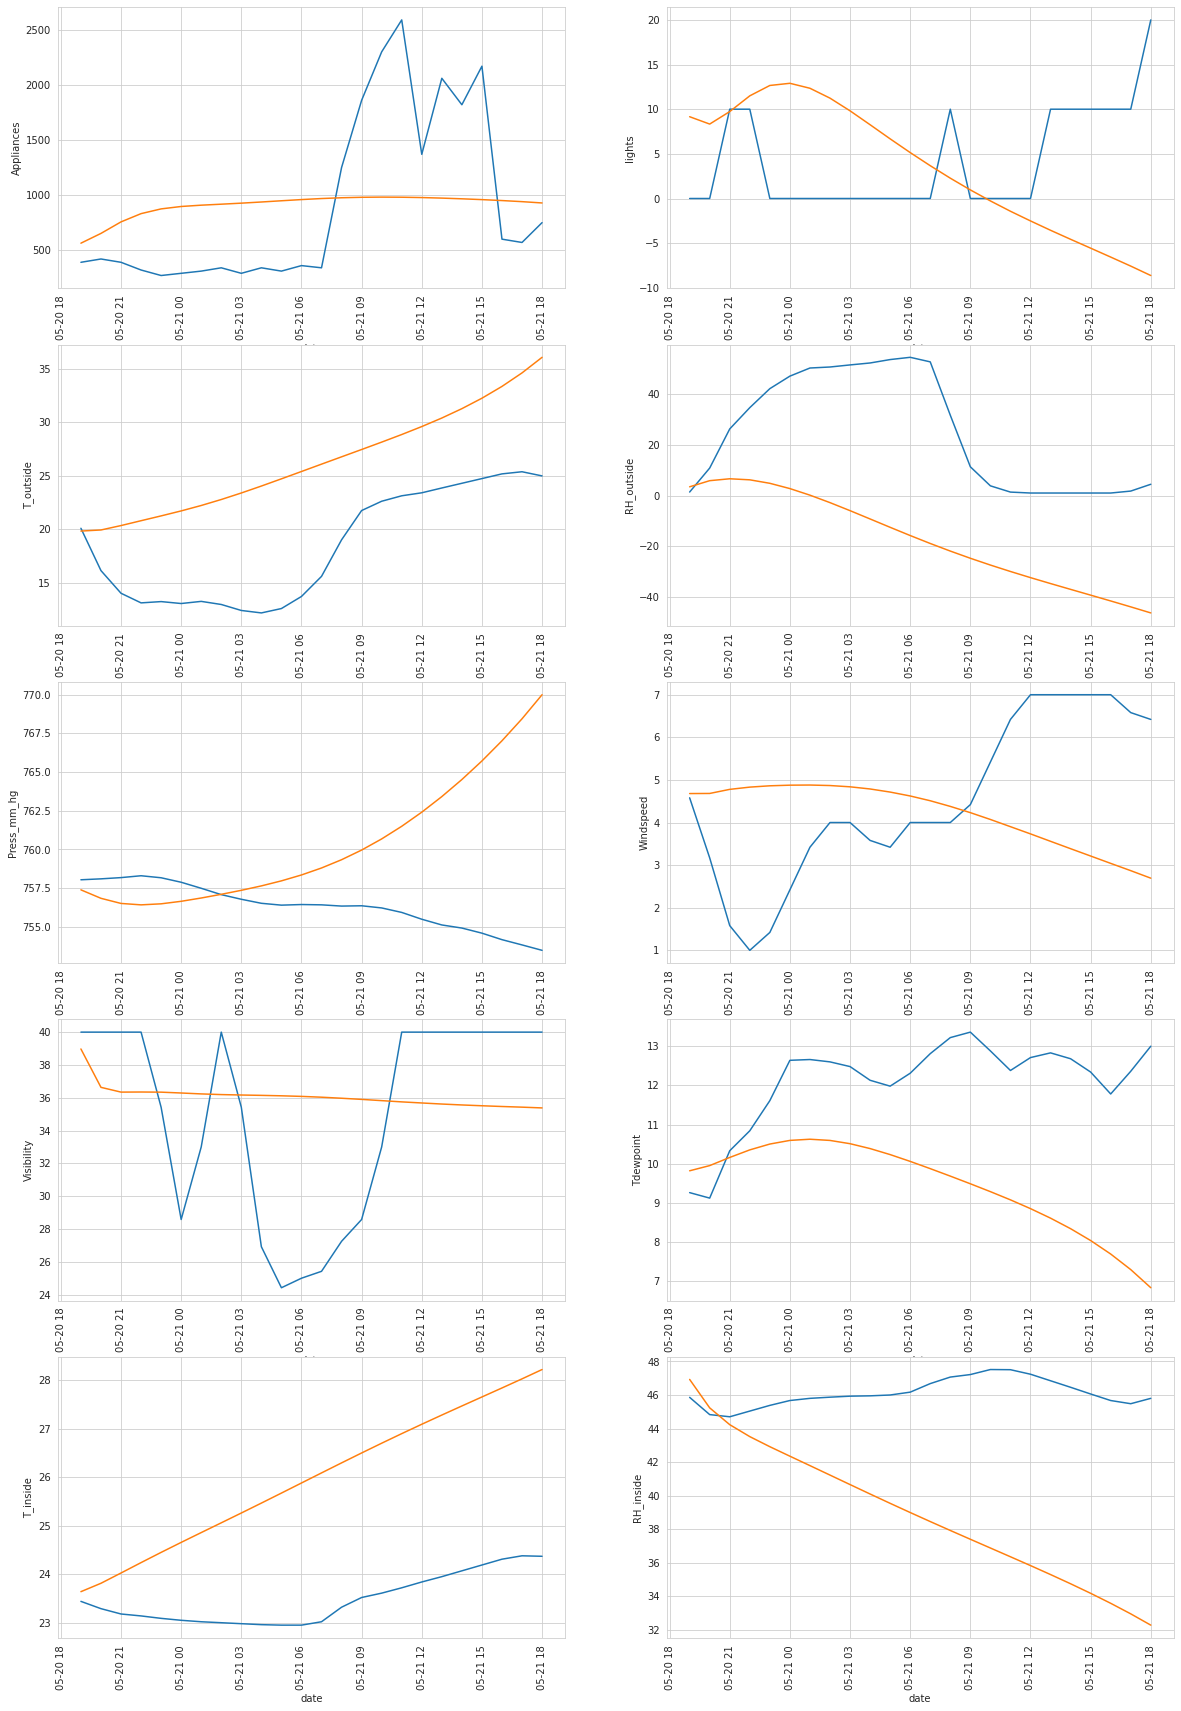

In [47]:
index = 0
plt.figure(figsize = (20, 30))

for i in test.columns:
    index += 1
    test_eva = pd.DataFrame(test_new[i])
    test_eva["predictions"] = predictions[i].values
    plt.subplot(5, 2, index)
    sns.lineplot(x = test_eva.index, y = test_eva[i])
    sns.lineplot(x = test_eva.index, y = test_eva.predictions)
    plt.xticks(rotation=90);

# Univariate Time Series for Appliances Feature

In [48]:
df_app = df[["Appliances"]]
df_app

,Appliances
date,
2016-01-11 17:00:00,330
2016-01-11 18:00:00,1060
2016-01-11 19:00:00,1040
2016-01-11 20:00:00,750
2016-01-11 21:00:00,620
...,...
2016-05-27 14:00:00,610
2016-05-27 15:00:00,460
2016-05-27 16:00:00,810


### Train Test Split

In [49]:
len(df_app)

3290

In [50]:
# How many rows per day?
24

24

In [51]:
test_days = 7

In [52]:
test_ind = test_days*24

In [53]:
test_ind

168

In [54]:
train = df_app.iloc[:-test_ind]
test = df_app.iloc[-test_ind:]

In [55]:
train.shape, test.shape

((3122, 1), (168, 1))

### Scale Data

In [56]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [57]:
scaler = MinMaxScaler()

In [58]:
scaler.fit(train)

MinMaxScaler()

In [59]:
train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

## Create the Model

In [60]:
length = 24 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(train_scaled, train_scaled, length=length, batch_size=batch_size)
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length=length, batch_size=batch_size)

In [61]:
len(train_scaled), len(generator), len(test_scaled), len(validation_generator)

(3122, 3098, 168, 144)

In [62]:
n_features = train_scaled.shape[1]

In [63]:
model = Sequential()

model.add(LSTM(100,input_shape=(length, n_features)))

model.add(Dense(n_features))

model.compile(optimizer='adam', loss='mse')

In [64]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [65]:
model.fit_generator(generator,
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

Epoch 1/10
3098/3098 [==============================] - 34s 10ms/step - loss: 0.0134 - val_loss: 0.0130
Epoch 2/10
3098/3098 [==============================] - 31s 10ms/step - loss: 0.0126 - val_loss: 0.0144
Epoch 3/10
3098/3098 [==============================] - 31s 10ms/step - loss: 0.0124 - val_loss: 0.0125
Epoch 4/10
3098/3098 [==============================] - 31s 10ms/step - loss: 0.0123 - val_loss: 0.0127
Epoch 5/10
3098/3098 [==============================] - 31s 10ms/step - loss: 0.0120 - val_loss: 0.0118
Epoch 6/10
3098/3098 [==============================] - 31s 10ms/step - loss: 0.0120 - val_loss: 0.0118
Epoch 7/10
3098/3098 [==============================] - 32s 10ms/step - loss: 0.0118 - val_loss: 0.0122
Epoch 8/10
3098/3098 [==============================] - 31s 10ms/step - loss: 0.0116 - val_loss: 0.0112
Epoch 9/10
3098/3098 [==============================] - 32s 10ms/step - loss: 0.0115 - val_loss: 0.0107
Epoch 10/10
3098/3098 [==============================] - 31s 10m

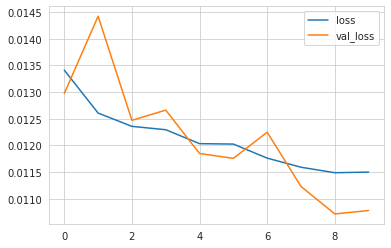

In [66]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Evaluate on Test Data

In [67]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [68]:
predictions_scaled

[array([0.11349721], dtype=float32),
 array([0.11265145], dtype=float32),
 array([0.11228457], dtype=float32),
 array([0.1096637], dtype=float32),
 array([0.10867423], dtype=float32),
 array([0.11036864], dtype=float32),
 array([0.114759], dtype=float32),
 array([0.12125962], dtype=float32),
 array([0.13124807], dtype=float32),
 array([0.14084455], dtype=float32),
 array([0.15117353], dtype=float32),
 array([0.15801427], dtype=float32),
 array([0.1598854], dtype=float32),
 array([0.15452015], dtype=float32),
 array([0.1406771], dtype=float32),
 array([0.12965761], dtype=float32),
 array([0.11932762], dtype=float32),
 array([0.11248495], dtype=float32),
 array([0.10831752], dtype=float32),
 array([0.10693339], dtype=float32),
 array([0.10770387], dtype=float32),
 array([0.11093087], dtype=float32),
 array([0.11568855], dtype=float32),
 array([0.12006336], dtype=float32)]

In [69]:
test_scaled[:length]

array([[0.06321839],
       [0.07183908],
       [0.06321839],
       [0.04310345],
       [0.02873563],
       [0.03448276],
       [0.04022989],
       [0.04885057],
       [0.03448276],
       [0.04885057],
       [0.04022989],
       [0.0545977 ],
       [0.04885057],
       [0.31034483],
       [0.48563218],
       [0.61206897],
       [0.6954023 ],
       [0.34482759],
       [0.54310345],
       [0.47413793],
       [0.57471264],
       [0.12356322],
       [0.11494253],
       [0.16666667]])

In [70]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: -0.18295815565955276 
mae: 0.17267599800366096 
mse: 0.05805353601062337 
rmse: 0.24094301403158253


## Inverse Transformations and Compare

In [71]:
predictions = scaler.inverse_transform(predictions_scaled)

In [72]:
compare = test[:length]

In [73]:
compare['Predictions'] = predictions

In [74]:
compare

,Appliances,Predictions
date,,
2016-05-20 19:00:00,390,564.970
2016-05-20 20:00:00,420,562.027
2016-05-20 21:00:00,390,560.750
2016-05-20 22:00:00,320,551.630
2016-05-20 23:00:00,270,548.186
2016-05-21 00:00:00,290,554.083
2016-05-21 01:00:00,310,569.361
2016-05-21 02:00:00,340,591.983
2016-05-21 03:00:00,290,626.743


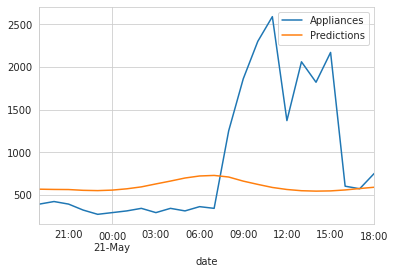

In [75]:
compare.plot()

<p style="text-align: center"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>